## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [9]:
# Load the cleaned pop genres dataset
pop_df_cleaned = pd.read_csv('pop_genres_dataset.csv')
print(f"Dataset shape: {pop_df_cleaned.shape}")
print(f"\nColumns: {pop_df_cleaned.columns.tolist()}")
pop_df_cleaned.head()

Dataset shape: (9000, 18)

Columns: ['artists', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,my little airport,每次你走的時分,47,183968,0,0.576,0.505,11,-13.070,0,0.0392,0.753,0.199000,0.151,0.570,127.025,4,cantopop
1,my little airport,下了兩天雨,44,172343,0,0.577,0.228,11,-14.684,1,0.0306,0.834,0.000805,0.384,0.161,119.035,4,cantopop
2,my little airport,詩歌舞街,50,191308,0,0.641,0.479,4,-15.395,1,0.0443,0.732,0.059800,0.115,0.301,121.974,4,cantopop
3,my little airport,那陣時不知道,48,148564,0,0.613,0.210,5,-15.309,1,0.0309,0.769,0.000477,0.139,0.268,132.035,4,cantopop
4,Eason Chan,無條件,54,228973,0,0.646,0.370,0,-10.980,1,0.0351,0.825,0.000005,0.090,0.465,129.914,4,cantopop


## Feature Binning

Create categorical bins for the 5 key continuous audio features (energy, acousticness, valence, loudness, danceability) to capture non-linear relationships and enable categorical analysis.

In [10]:
# Create binned features for the 5 key audio features

# Energy bins (0-1 scale)
pop_df_cleaned['energy_bin'] = pd.cut(
    pop_df_cleaned['energy'],
    bins=[0, 0.33, 0.67, 1.0],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Acousticness bins (0-1 scale)
pop_df_cleaned['acousticness_bin'] = pd.cut(
    pop_df_cleaned['acousticness'],
    bins=[0, 0.33, 0.67, 1.0],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Valence bins (0-1 scale) - musical positiveness
pop_df_cleaned['valence_bin'] = pd.cut(
    pop_df_cleaned['valence'],
    bins=[0, 0.33, 0.67, 1.0],
    labels=['Negative', 'Neutral', 'Positive'],
    include_lowest=True
)

# Loudness bins (typically -60 to 0 dB)
pop_df_cleaned['loudness_bin'] = pd.cut(
    pop_df_cleaned['loudness'],
    bins=[-60, -20, -10, 0],
    labels=['Quiet', 'Medium', 'Loud'],
    include_lowest=True
)

# Danceability bins (0-1 scale)
pop_df_cleaned['danceability_bin'] = pd.cut(
    pop_df_cleaned['danceability'],
    bins=[0, 0.33, 0.67, 1.0],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

print("Feature Binning Summary:")

Feature Binning Summary:


## Visualize Binned Feature Distributions

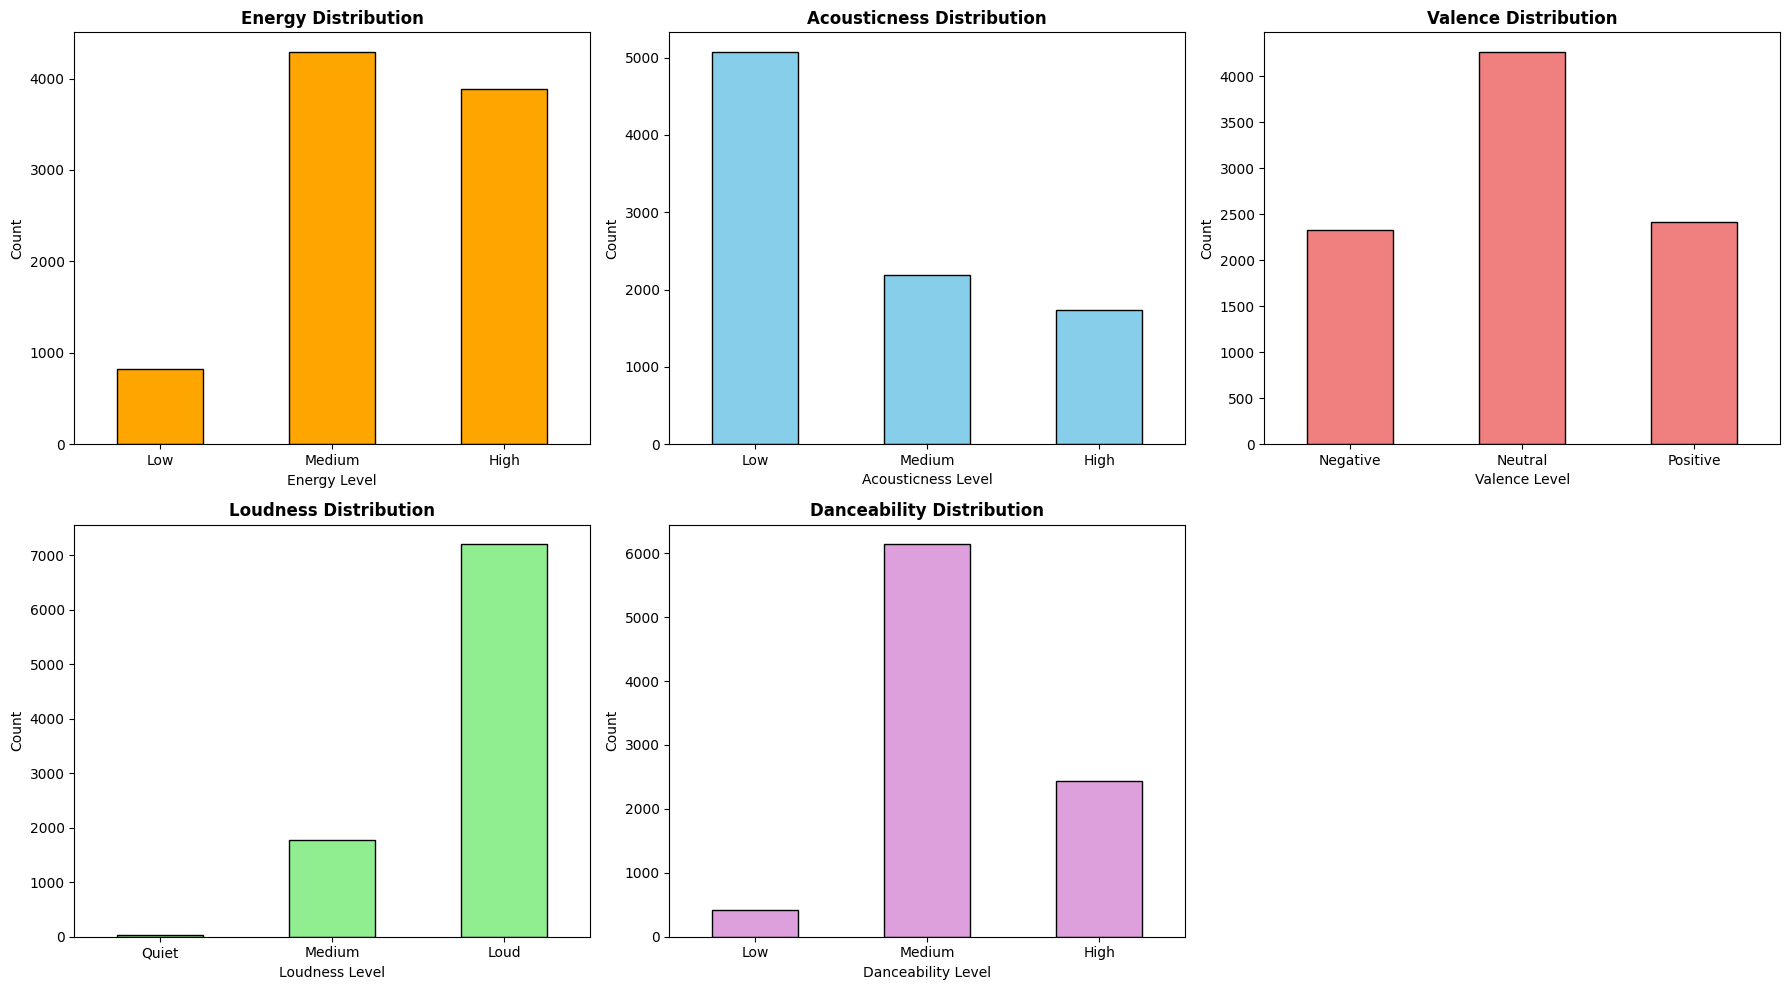

In [11]:
# Visualize the binned features for all 5 key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Energy
pop_df_cleaned['energy_bin'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='orange', edgecolor='black'
)
axes[0].set_title('Energy Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Energy Level')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Acousticness
pop_df_cleaned['acousticness_bin'].value_counts().sort_index().plot(
    kind='bar', ax=axes[1], color='skyblue', edgecolor='black'
)
axes[1].set_title('Acousticness Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Acousticness Level')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

# Valence
pop_df_cleaned['valence_bin'].value_counts().sort_index().plot(
    kind='bar', ax=axes[2], color='lightcoral', edgecolor='black'
)
axes[2].set_title('Valence Distribution', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Valence Level')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=0)

# Loudness
pop_df_cleaned['loudness_bin'].value_counts().sort_index().plot(
    kind='bar', ax=axes[3], color='lightgreen', edgecolor='black'
)
axes[3].set_title('Loudness Distribution', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Loudness Level')
axes[3].set_ylabel('Count')
axes[3].tick_params(axis='x', rotation=0)

# Danceability
pop_df_cleaned['danceability_bin'].value_counts().sort_index().plot(
    kind='bar', ax=axes[4], color='plum', edgecolor='black'
)
axes[4].set_title('Danceability Distribution', fontsize=12, fontweight='bold')
axes[4].set_xlabel('Danceability Level')
axes[4].set_ylabel('Count')
axes[4].tick_params(axis='x', rotation=0)

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

## Analyze Relationship Between Binned Features and Popularity

/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_93420/719131719.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_df_cleaned.groupby('energy_bin')['popularity'].mean().plot(
/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_93420/719131719.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_df_cleaned.groupby('acousticness_bin')['popularity'].mean().plot(
/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_93420/719131719.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

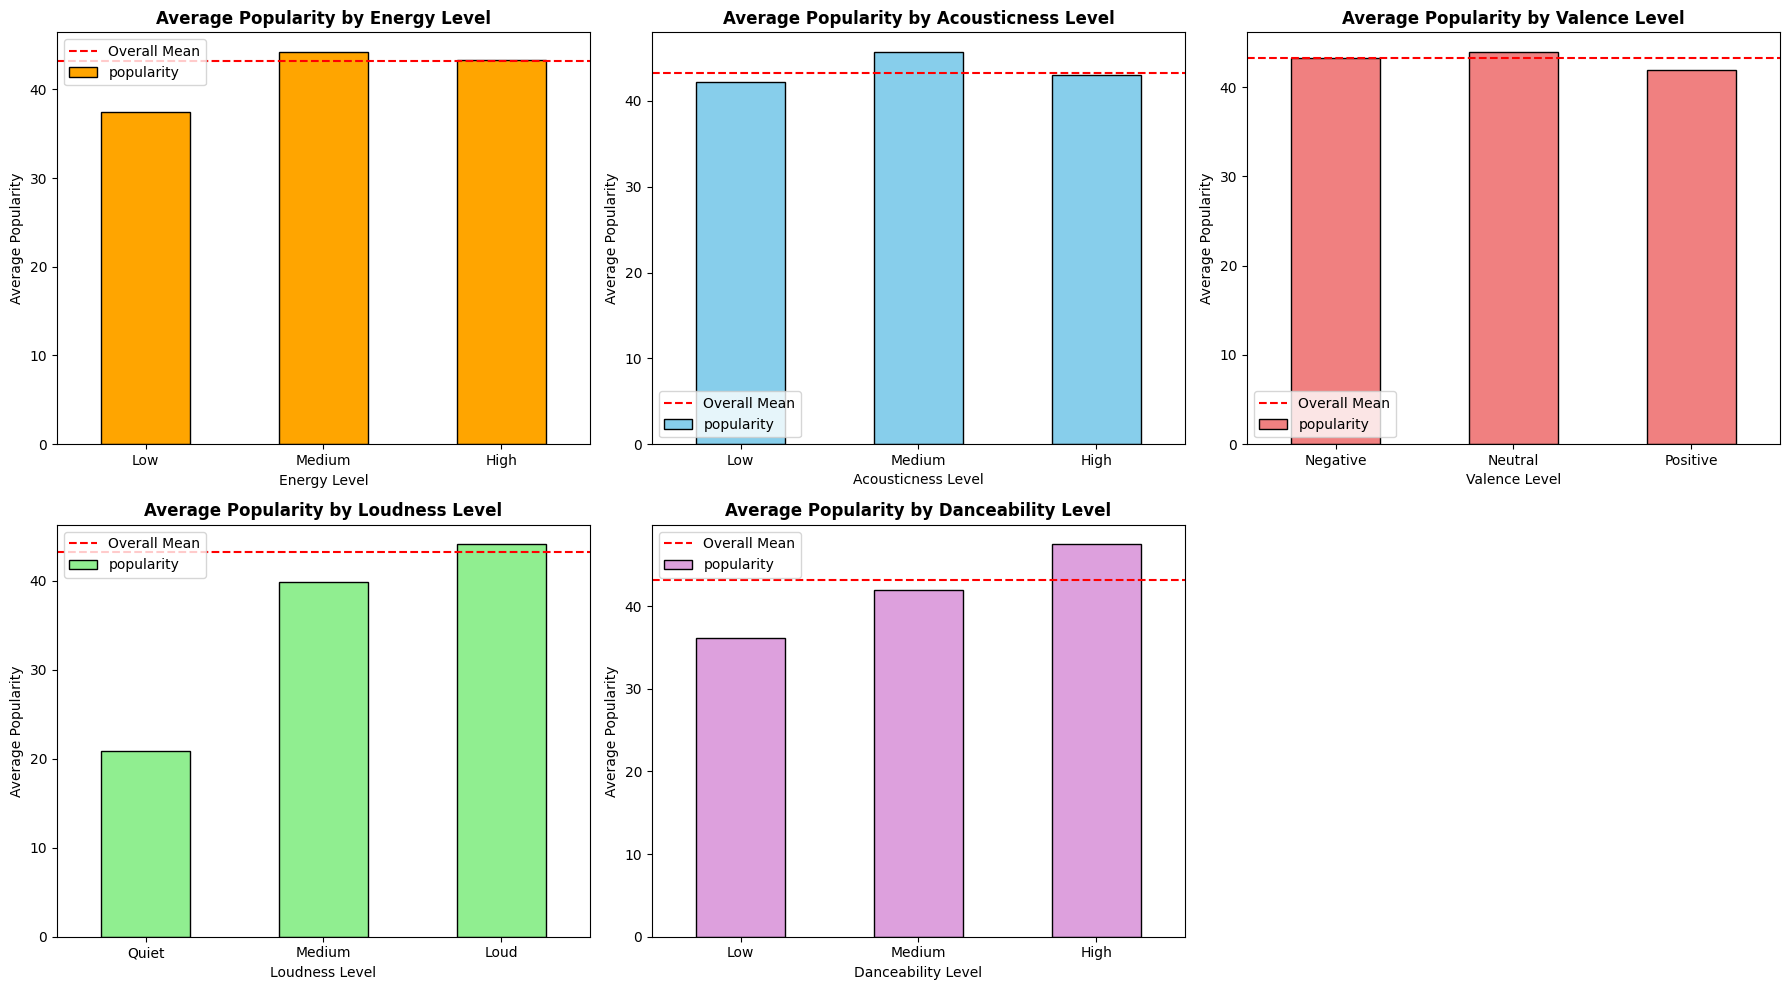

In [12]:
# Show relationship between binned features and popularity for all 5 key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Energy vs Popularity
pop_df_cleaned.groupby('energy_bin')['popularity'].mean().plot(
    kind='bar', ax=axes[0], color='orange', edgecolor='black'
)
axes[0].set_title('Average Popularity by Energy Level', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Energy Level')
axes[0].set_ylabel('Average Popularity')
axes[0].tick_params(axis='x', rotation=0)
axes[0].axhline(y=pop_df_cleaned['popularity'].mean(), color='red', linestyle='--', label='Overall Mean')
axes[0].legend()

# Acousticness vs Popularity
pop_df_cleaned.groupby('acousticness_bin')['popularity'].mean().plot(
    kind='bar', ax=axes[1], color='skyblue', edgecolor='black'
)
axes[1].set_title('Average Popularity by Acousticness Level', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Acousticness Level')
axes[1].set_ylabel('Average Popularity')
axes[1].tick_params(axis='x', rotation=0)
axes[1].axhline(y=pop_df_cleaned['popularity'].mean(), color='red', linestyle='--', label='Overall Mean')
axes[1].legend()

# Valence vs Popularity
pop_df_cleaned.groupby('valence_bin')['popularity'].mean().plot(
    kind='bar', ax=axes[2], color='lightcoral', edgecolor='black'
)
axes[2].set_title('Average Popularity by Valence Level', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Valence Level')
axes[2].set_ylabel('Average Popularity')
axes[2].tick_params(axis='x', rotation=0)
axes[2].axhline(y=pop_df_cleaned['popularity'].mean(), color='red', linestyle='--', label='Overall Mean')
axes[2].legend()

# Loudness vs Popularity
pop_df_cleaned.groupby('loudness_bin')['popularity'].mean().plot(
    kind='bar', ax=axes[3], color='lightgreen', edgecolor='black'
)
axes[3].set_title('Average Popularity by Loudness Level', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Loudness Level')
axes[3].set_ylabel('Average Popularity')
axes[3].tick_params(axis='x', rotation=0)
axes[3].axhline(y=pop_df_cleaned['popularity'].mean(), color='red', linestyle='--', label='Overall Mean')
axes[3].legend()

# Danceability vs Popularity
pop_df_cleaned.groupby('danceability_bin')['popularity'].mean().plot(
    kind='bar', ax=axes[4], color='plum', edgecolor='black'
)
axes[4].set_title('Average Popularity by Danceability Level', fontsize=12, fontweight='bold')
axes[4].set_xlabel('Danceability Level')
axes[4].set_ylabel('Average Popularity')
axes[4].tick_params(axis='x', rotation=0)
axes[4].axhline(y=pop_df_cleaned['popularity'].mean(), color='red', linestyle='--', label='Overall Mean')
axes[4].legend()

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

## Summary Statistics by Bins

In [13]:
# Detailed statistics for each binned feature
print("Average Popularity by Energy Level:")
print(pop_df_cleaned.groupby('energy_bin')['popularity'].agg(['mean', 'median', 'std', 'count']))
print("\n" + "="*60)

print("\nAverage Popularity by Acousticness Level:")
print(pop_df_cleaned.groupby('acousticness_bin')['popularity'].agg(['mean', 'median', 'std', 'count']))
print("\n" + "="*60)

print("\nAverage Popularity by Valence Level:")
print(pop_df_cleaned.groupby('valence_bin')['popularity'].agg(['mean', 'median', 'std', 'count']))
print("\n" + "="*60)

print("\nAverage Popularity by Loudness Level:")
print(pop_df_cleaned.groupby('loudness_bin')['popularity'].agg(['mean', 'median', 'std', 'count']))
print("\n" + "="*60)

print("\nAverage Popularity by Danceability Level:")
print(pop_df_cleaned.groupby('danceability_bin')['popularity'].agg(['mean', 'median', 'std', 'count']))

Average Popularity by Energy Level:
                 mean  median        std  count
energy_bin                                     
Low         37.498173    43.0  22.221042    821
Medium      44.213470    49.0  22.710484   4291
High        43.283693    47.0  23.265694   3888


Average Popularity by Acousticness Level:
                       mean  median        std  count
acousticness_bin                                     
Low               42.202050    46.0  23.866537   5073
Medium            45.697122    51.0  21.931527   2189
High              42.963751    48.0  21.358345   1738


Average Popularity by Valence Level:
                  mean  median        std  count
valence_bin                                     
Negative     43.197074    48.0  21.898012   2324
Neutral      43.929878    49.0  23.032792   4264
Positive     41.909619    46.0  23.845211   2412


Average Popularity by Loudness Level:
                   mean  median        std  count
loudness_bin                        

/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_93420/3504767567.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pop_df_cleaned.groupby('energy_bin')['popularity'].agg(['mean', 'median', 'std', 'count']))
/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_93420/3504767567.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pop_df_cleaned.groupby('acousticness_bin')['popularity'].agg(['mean', 'median', 'std', 'count']))
/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_93420/3504767567.py:11: FutureWarning: The default of observed=False is deprecated and will be chan

## Save Dataset with Binned Features

In [14]:
# Save the dataset with binned features
pop_df_cleaned.to_csv('pop_genres_dataset_with_bins.csv', index=False)
print(f"Dataset with binned features saved!")
print(f"Shape: {pop_df_cleaned.shape}")
print(f"\nNew binned columns: {['energy_bin', 'acousticness_bin', 'valence_bin', 'loudness_bin', 'danceability_bin']}")
print(f"\nAll columns: {pop_df_cleaned.columns.tolist()}")

Dataset with binned features saved!
Shape: (9000, 23)

New binned columns: ['energy_bin', 'acousticness_bin', 'valence_bin', 'loudness_bin', 'danceability_bin']

All columns: ['artists', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'energy_bin', 'acousticness_bin', 'valence_bin', 'loudness_bin', 'danceability_bin']
